https://scikit-optimize.github.io/notebooks/hyperparameter-optimization.html

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

def objective(params):
    max_depth, learning_rate, max_features, min_samples_split, min_samples_leaf = params

    reg.set_params(max_depth=max_depth,
                   learning_rate=learning_rate,
                   max_features=max_features,
                   min_samples_split=min_samples_split, 
                   min_samples_leaf=min_samples_leaf)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

In [4]:
space  = [(1, 5),                           # max_depth
          (10**-5, 10**0, "log-uniform"),   # learning_rate
          (1, n_features),                  # max_features
          (2, 100),                         # min_samples_split
          (1, 100)]                         # min_samples_leaf

In [5]:
from skopt import gp_minimize

res_gp = gp_minimize(objective, space, n_calls=100, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=3.0920'

In [6]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=1
- learning_rate=0.264968
- max_features=7
- min_samples_split=100
- min_samples_leaf=16


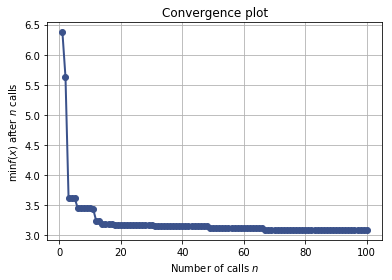

In [7]:
from skopt.plots import plot_convergence

plot_convergence(res_gp);